### Mohsin Shah

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1. Collecting Data Set

In [4]:
df = pd.read_csv("Spam_NotSpam_Mails.csv",  encoding='ISO-8859-1')

In [5]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


### 2. Pre Processing and Feature Selection

In [6]:
# First of all i have to drop the extra columns from the Dataset.
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
# Now to change the name of the columns.
df = df.rename(columns = {"v1" : "Type","v2" : "Mails"})

In [8]:
df.head(2)

,Type,Mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
# Now to check the 'info' function.
# Check the null value and remove it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    5572 non-null   object
 1   Mails   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

Type     0
Mails    0
dtype: int64

In [11]:
# There is no null value in the Dataset
# Check the duplicate mails and then remove it
df.duplicated().sum()

403

In [12]:
# There are 403 duplicate mails, so i remove it, for best accuracy.
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

#### Used label Encoding on 'Type' columns of the Dataset.

In [14]:
from sklearn.preprocessing import LabelEncoder
L_Encoder = LabelEncoder()

In [15]:
df.Type = L_Encoder.fit_transform(df.Type)

In [16]:
df.Type.value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

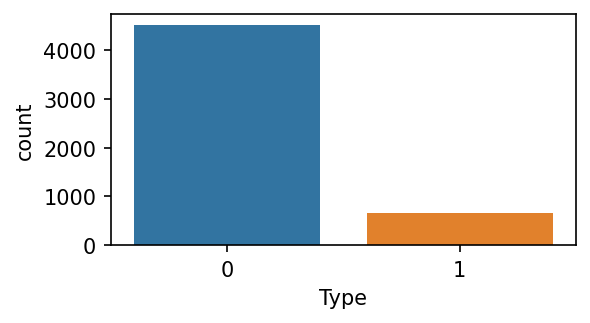

In [17]:
# To visualize the Type of spam and Unspem mails
plt.figure(figsize = (4,2), dpi = 150)
sb.countplot(data = df, x = df.Type)

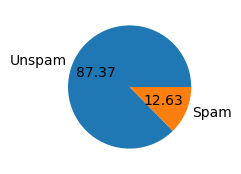

In [18]:
# autopct is a string or function used to label the wedges with their numeric value
plt.figure(figsize = (2,2))
plt.pie(df['Type'].value_counts(), labels = ['Unspam','Spam'], autopct = '%.2f')
plt.show()

#### Now we have to remove stopwords and punctuation from dataset.

In [19]:
import string
string.punctuation   # These all are Punctuation !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
# This function convert sentence into lower case, then divide it into words
# Then it will remove stop words and punctuation, which are not necessary for model 

def transform_text(text):
    text = text.lower()  # It convert all the sentence into lower case
    text = nltk.word_tokenize(text) # It divide the sentences into word

    y = []
    for t in text:
        if t.isalnum():  # This function will remove all Special Character from the words
            y.append(t) # It will return the words except special character 
            
    text = y[:] 
    y.clear()

    for t in text:
        # isalnum and string.punctuation both work same. if we used any one of them, it will remove the punctuation
        # if there is any stop word or punctuation it will be removed from the words.
        if t not in stopwords.words('english') and t not in string.punctuation:
            y.append(t)

    return " ".join(y)
    

In [22]:
df["Mails"].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Mails, Length: 5169, dtype: object

In [23]:
df['Mails'] = df["Mails"].apply(transform_text)

In [24]:
df.head(2)

,Type,Mails
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni


### 3. Apply Spam Filter Algorithm, Train and Test Data

#### TFIDF vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer()

In [26]:
x = tfidf.fit_transform(df['Mails']).toarray()

In [27]:
y = df['Type'].values

In [28]:
y

array([0, 0, 1, ..., 0, 0, 0])

#### Train Test Split 

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3, random_state = 2)

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Guassian naive bayes

In [31]:
gnb.fit(xtrain,ytrain)
ypred = gnb.predict(xtest)

In [32]:
print("Accuracy Score = ", accuracy_score(ytest,ypred))
print("Error rate = ",  1 - accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Accuracy Score =  0.8936170212765957
Error rate =  0.1063829787234043
[[1230  130]
 [  35  156]]


Multinomia naive bayes

In [33]:
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)

In [34]:
print("Accuracy Score = ", accuracy_score(ytest,ypred))
print("Errore rate = ",  1 - accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Accuracy Score =  0.9542230818826564
Errore rate =  0.045776918117343635
[[1360    0]
 [  71  120]]


Bernoili naive bayes

In [35]:
bnb.fit(xtrain,ytrain)
ypred = bnb.predict(xtest)

In [36]:
print("Accuracy Score", accuracy_score(ytest,ypred))
print("Errore rate = ",  1 - accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

Accuracy Score 0.9664732430689877
Errore rate =  0.03352675693101226
[[1354    6]
 [  46  145]]


### 4. Confusion Matrix

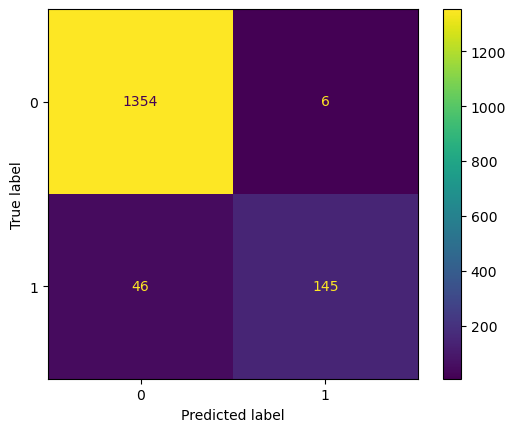

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bnb,xtest,ytest)

### 5. Accuracy

The Best Accuracy and low error rate is guassian Naive bayes Algorithm